# 음성데이터 자르기

In [ ]:
from scipy.io import wavfile
from sklearn.utils import resample
import numpy as np
import librosa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


file_dir: /content/drive/MyDrive/KETI_MULTIMODAL_0000000517
file_id: KETI_MULTIMODAL_0000000517.mp4


<ipython-input-4-9031db02d947>:14: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4, sr=16000)
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


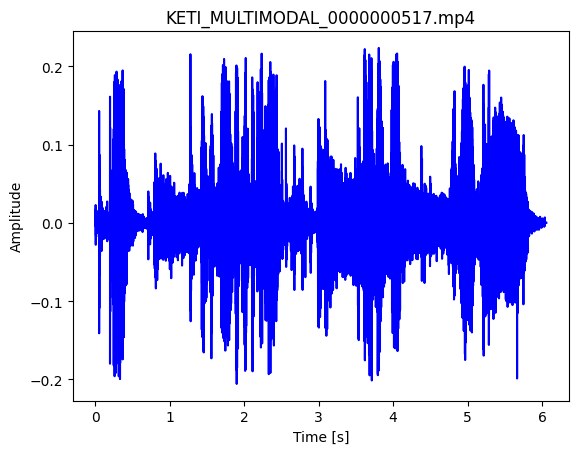

<ipython-input-4-9031db02d947>:25: UserWarning: PySoundFile failed. Trying audioread instead.
  t, tt = librosa.load(mp4, sr = 44100, duration = 10)
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


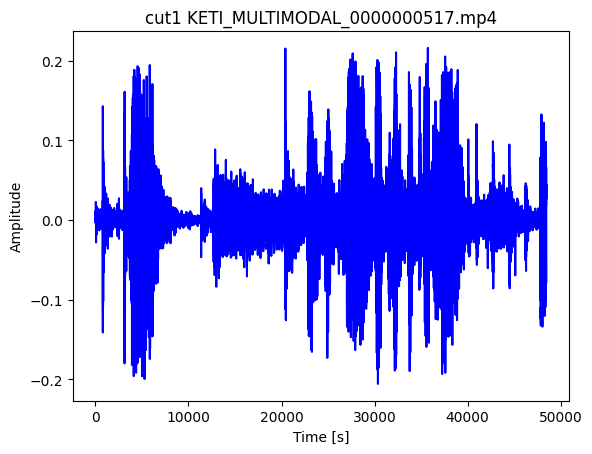

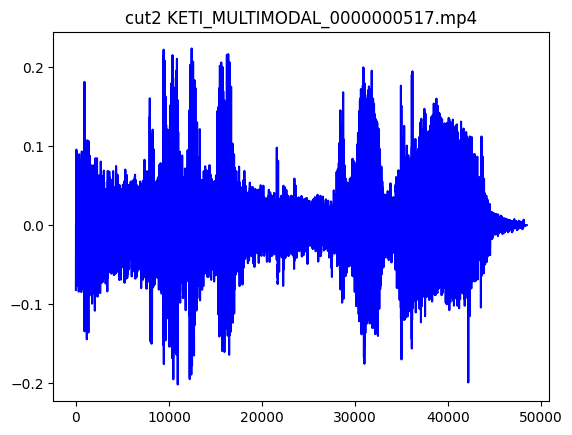

split to KETI_MULTIMODAL_00000005171	 KETI_MULTIMODAL_00000005172


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import IPython.display
import soundfile as sf

mp4 = '/content/drive/MyDrive/KETI_MULTIMODAL_0000000517/KETI_MULTIMODAL_0000000517.mp4'
(file_dir, file_id) = os.path.split(mp4)
print("file_dir:", file_dir)
print("file_id:", file_id)

# original's plot
y, sr = librosa.load(mp4, sr=16000)
time = np.linspace(0, len(y)/sr, len(y)) # time axis
fig, ax1 = plt.subplots() # plot
ax1.plot(time, y, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title(file_id) # 제목
plt.savefig(file_id+'.png')
plt.show()


t, tt = librosa.load(mp4, sr = 44100, duration = 10)
IPython.display.Audio(data = t, rate = tt)

# cut half and save
half = len(y)/2
y1 = y[:round(half)]
y2 = y[round(half):]

time1 = np.linspace(0,half, len(y1))
time2 = np.linspace(0, half, len(y2))

# 절반씩 자른 음성 plot 
fig1, ax1 = plt.subplots()
ax1.plot(time1, y1, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title('cut1 '+file_id)
plt.savefig('cut_half1 '+file_id+'.png')
plt.show()


fig2, ax2 = plt.subplots()
ax2.plot(time2, y2, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title('cut2 '+file_id)
plt.savefig('cut_half2 '+file_id+'.png')
plt.show()

# 파일 저장
file_name = file_id[:-4]
file1_name = "/content/drive/MyDrive/KETI_MULTIMODAL_0000000517/cut_waves" + file_name + "_1.wav"
file2_name = "/content/drive/MyDrive/KETI_MULTIMODAL_0000000517/cut_waves" + file_name + "_2.wav"
sf.write(file1_name, y1, sr)
sf.write(file2_name, y2, sr)
print(f"split to {file_name}1\t {file_name}2")
sf.write('cut_file', y2, sr, format = 'WAV')

In [ ]:
# 원본 음성 듣기
origin, orign2 = librosa.load(mp4, sr = 44100, duration = 10)
IPython.display.Audio(data = origin, rate = orign2 )

<ipython-input-5-8cba17795137>:1: UserWarning: PySoundFile failed. Trying audioread instead.
  origin, orign2 = librosa.load(mp4, sr = 44100, duration = 10)
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
# 잘린 음성 듣기 1
cut1, cut11 = librosa.load(file1_name, sr = 44100, duration = 10)
IPython.display.Audio(data = cut1, rate = cut11)


In [ ]:
# 잘린 음성 듣기 1
cut2, cut22 = librosa.load(file2_name, sr = 44100, duration = 10)
IPython.display.Audio(data = cut2, rate = cut22 )

# Mel_Spectrogram

In [ ]:
frame_length = 0.025
frame_stride = 0.010

# mel_spectrogram 함수
def Mel_S(wav_file):
    # mel-spectrogram
    y, sr = librosa.load(wav_file, sr=16000)

    # wav_length = len(y)/sr
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))

    S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)

    print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))


    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.tight_layout()
    plt.savefig('Mel-Spectrogram example.png')
    plt.show()

    return S


Wav length: 3.029375, Mel_S shape:(40, 303)


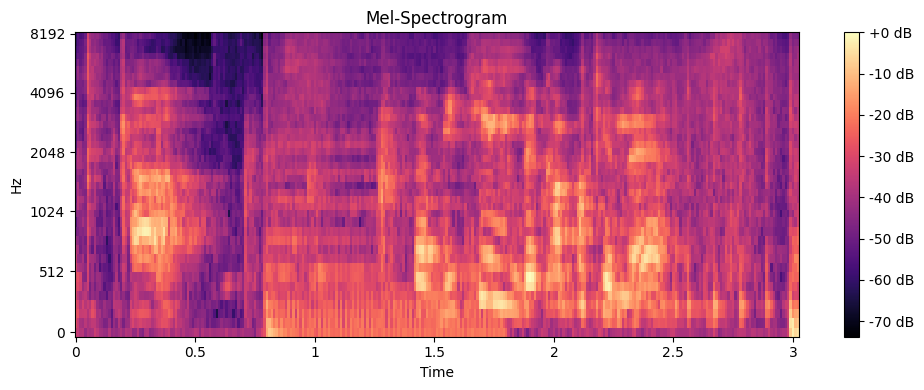

In [ ]:
# 첫번째 잘린 음성 mel-spectogram
man_original_data = file1_name
mel_spec = Mel_S(man_original_data)
     

Wav length: 3.0293125, Mel_S shape:(40, 303)


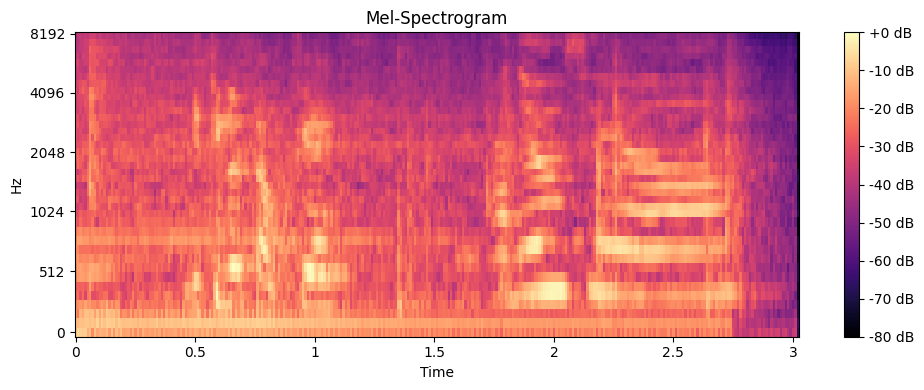

In [ ]:
# 두번째 잘린 음성 mel-spectogram
man_original_data = file2_name
mel_spec = Mel_S(man_original_data)